In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plts

%matplotlib inline

In [4]:
df10 = pd.read_csv('DATA/clean10.csv', index_col=0)
df20 = pd.read_csv('DATA/clean20.csv', index_col=0)

In [5]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 4 to 8850
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOM_MUN     7031 non-null   object
 1   LOC         7031 non-null   int64 
 2   NOM_LOC     7031 non-null   object
 3   AGEB        7031 non-null   object
 4   MZA         7031 non-null   int64 
 5   P_TOTAL     7031 non-null   int64 
 6   P_0A2       7031 non-null   object
 7   P_3A5       7031 non-null   object
 8   POB65_MAS   7031 non-null   object
 9   GRAPROES    7031 non-null   object
 10  PROM_HNV    7031 non-null   object
 11  VIVTOT      7031 non-null   int64 
 12  PRO_OCUP_C  7031 non-null   object
 13  PROM_OCUP   7031 non-null   object
 14  VPH_PC      7031 non-null   object
 15  PNACOE      7031 non-null   object
dtypes: int64(4), object(12)
memory usage: 933.8+ KB


nos limitamos a ensenada

In [6]:
df_ens_10 = df10[df10['NOM_LOC'] == 'Ensenada']
df_ens_10.reset_index(inplace=True)

df_ens_20 = df20[df20['NOM_LOC'] == 'Ensenada']
df_ens_20.reset_index(inplace=True)

In [7]:
df_ens_10

,index,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,P_TOTAL,P_0A2,P_3A5,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,PNACOE
0,4,Ensenada,1,Ensenada,0435,1,48,*,3,4,8.31,2.50,15,1.02,3.43,7,16
1,5,Ensenada,1,Ensenada,0435,3,41,*,0,6,9.48,2.40,16,0.85,3.15,4,16
2,6,Ensenada,1,Ensenada,0435,4,41,3,*,4,10.29,1.88,11,0.87,4.10,7,16
3,7,Ensenada,1,Ensenada,0435,6,54,*,*,*,10.24,1.82,23,0.72,3.18,10,17
4,8,Ensenada,1,Ensenada,0435,7,54,3,3,7,9.85,2.33,17,0.78,3.38,7,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5250,5442,Ensenada,1,Ensenada,9890,5,7,0,*,*,2,2.50,5,0.88,2.33,0,5
5251,5443,Ensenada,1,Ensenada,9890,6,0,0,0,0,0,0,0,0,0,0,0
5252,5444,Ensenada,1,Ensenada,9890,7,5,*,*,*,*,*,5,*,*,*,*
5253,5445,Ensenada,1,Ensenada,9890,8,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_ens_10['NOM_LOC'].size

5255

cuantas agebs tenemos? 

In [9]:
df_ens_10['AGEB'].unique().size

190

In [10]:
df_ens_10['AGEB'].unique().max()

'9903'

In [11]:
df_ens_10['MZA'].unique().max()

100

tiramos la manzana 800, esta fuera del rango usual y puede significar otra cosa

In [12]:
#drop row if mza is 800
df_ens_10 = df_ens_10[df_ens_10['MZA'] != 800]

df_ens_20 = df_ens_20[df_ens_20['MZA'] != 800]

In [13]:
df_ens_10['MZA'].unique().max()

100

In [14]:
df_ens_10.describe()

,index,LOC,MZA,P_TOTAL,VIVTOT
count,5255.000000,5255.0,5255.000000,5255.000000,5255.000000
mean,2723.169553,1.0,22.216936,53.237869,19.150143
std,1571.823135,0.0,16.461110,68.790277,19.594114
min,4.000000,1.0,1.000000,0.000000,0.000000
25%,1353.500000,1.0,9.000000,16.000000,6.000000
50%,2732.000000,1.0,19.000000,41.000000,15.000000
75%,4078.500000,1.0,32.000000,72.000000,26.000000
max,5447.000000,1.0,100.000000,3018.000000,360.000000


In [15]:
df_ens_10[ df_ens_10['VIVTOT'] == 364.000000]

,index,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,P_TOTAL,P_0A2,P_3A5,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,PNACOE


necesitamos limpiar los datos, quitar los valores no numericos de las variables numericas

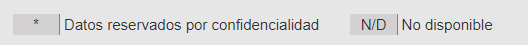

primero vamos a renombrar PNACOE ya que no es muy intuitivo

In [16]:
#rename column PNACOE for OTRAENT
df_ens_10.rename(columns={'PNACOE':'OTRAENT'}, inplace=True)

df_ens_20.rename(columns={'PNACOE':'OTRAENT'}, inplace=True)

In [17]:
df_ens_10.head(1)

,index,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,P_TOTAL,P_0A2,P_3A5,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT
0,4,Ensenada,1,Ensenada,0435,1,48,*,3,4,8.31,2.50,15,1.02,3.43,7,16


ahora si a limpiar

In [18]:
limpiar = ['P_TOTAL', 'P_0A2', 'P_3A5', 'POB65_MAS', 'GRAPROES', 'PROM_HNV', 'VIVTOT', 'PRO_OCUP_C', 'PROM_OCUP', 'VPH_PC', 'OTRAENT']

In [19]:
df_ens_10[limpiar]

,P_TOTAL,P_0A2,P_3A5,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT
0,48,*,3,4,8.31,2.50,15,1.02,3.43,7,16
1,41,*,0,6,9.48,2.40,16,0.85,3.15,4,16
2,41,3,*,4,10.29,1.88,11,0.87,4.10,7,16
3,54,*,*,*,10.24,1.82,23,0.72,3.18,10,17
4,54,3,3,7,9.85,2.33,17,0.78,3.38,7,18
...,...,...,...,...,...,...,...,...,...,...,...
5250,7,0,*,*,2,2.50,5,0.88,2.33,0,5
5251,0,0,0,0,0,0,0,0,0,0,0
5252,5,*,*,*,*,*,5,*,*,*,*
5253,0,0,0,0,0,0,0,0,0,0,0


El unico problema son los asteriscos? o habra otros valores que estorban?

In [21]:
#print the values that cannot be converted to float
erorrs10 = []
for col in limpiar:
    for i in df_ens_10[col]:
        try:
            float(i)
        except:
            erorrs10.append(i)


In [22]:
pd.Series(erorrs10).unique()

array(['*'], dtype=object)

In [23]:
#print the values that cannot be converted to float
erorrs20 = []
for col in limpiar:
    for i in df_ens_20[col]:
        try:
            float(i)
        except:
            erorrs20.append(i)

In [24]:
pd.Series(erorrs20).unique()

array(['*'], dtype=object)

Solo hay *

In [25]:
#replace * with the last value
for col in limpiar:
    df_ens_10[col] = df_ens_10[col].replace('*', np.nan)
    df_ens_10[col] = df_ens_10[col].fillna(method='ffill')
    df_ens_10[col] = df_ens_10[col].fillna(method='bfill')


#replace * with the last value
for col in limpiar:
    df_ens_20[col] = df_ens_20[col].replace('*', np.nan)
    df_ens_20[col] = df_ens_20[col].fillna(method='ffill')
    df_ens_20[col] = df_ens_20[col].fillna(method='bfill')

In [26]:
#convert to float the columns in limpiar
for col in limpiar:
    df_ens_10[col] = df_ens_10[col].astype(float)

#convert to float the columns in limpiar
for col in limpiar:
    df_ens_20[col] = df_ens_20[col].astype(float)

In [27]:
df_ens_10[limpiar].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5255 entries, 0 to 5254
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   P_TOTAL     5255 non-null   float64
 1   P_0A2       5255 non-null   float64
 2   P_3A5       5255 non-null   float64
 3   POB65_MAS   5255 non-null   float64
 4   GRAPROES    5255 non-null   float64
 5   PROM_HNV    5255 non-null   float64
 6   VIVTOT      5255 non-null   float64
 7   PRO_OCUP_C  5255 non-null   float64
 8   PROM_OCUP   5255 non-null   float64
 9   VPH_PC      5255 non-null   float64
 10  OTRAENT     5255 non-null   float64
dtypes: float64(11)
memory usage: 492.7 KB


In [28]:
df_ens_20[limpiar].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5987 entries, 0 to 6006
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   P_TOTAL     5987 non-null   float64
 1   P_0A2       5987 non-null   float64
 2   P_3A5       5987 non-null   float64
 3   POB65_MAS   5987 non-null   float64
 4   GRAPROES    5987 non-null   float64
 5   PROM_HNV    5987 non-null   float64
 6   VIVTOT      5987 non-null   float64
 7   PRO_OCUP_C  5987 non-null   float64
 8   PROM_OCUP   5987 non-null   float64
 9   VPH_PC      5987 non-null   float64
 10  OTRAENT     5987 non-null   float64
dtypes: float64(11)
memory usage: 561.3 KB


vamos a descargar nuestros csv's limpios

In [29]:
#download the cleaned data
df_ens_10.to_csv('DATA/ENS_CLEAN_10.csv')
df_ens_20.to_csv('DATA/ENS_CLEAN_20.csv')